# Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy.signal as ss
import matplotlib
import matplotlib.pyplot as plt
import os
plt.rcParams['image.origin']='lower'

from mpdaf.obj import Cube,Image
from mpdaf.sdetect import Catalog

from deblend import odhin
from deblend.deblend_utils import extractHST

# Import data

In [3]:
cube = Cube('../data/DATACUBE_UDF-10.fits')

In [54]:
imHST = Image("../data/hlsp_xdf_hst_acswfc-30mas_hudf_f775w_v1_sci.fits")
imMUSE = Image("../data/IMAGE_UDF-10.fits")
segmap = Image("../data/segmentation_map_rafelski_2015.fits")


cat = Catalog.read('../data/uvudf_rafelski_2015.fits')
cat.add_index('ID')

def getImHst(imMUSE):
    """
    Get hst images for MUSE field
    """
    listIm = []
    for fname in ["hlsp_xdf_hst_acswfc-30mas_hudf_f606w_v1_sci.fits",
                  "hlsp_xdf_hst_acswfc-30mas_hudf_f775w_v1_sci.fits",
                  "hlsp_xdf_hst_acswfc-30mas_hudf_f814w_v1_sci.fits",
                  "hlsp_xdf_hst_acswfc-30mas_hudf_f850lp_v1_sci.fits"
                 ]:
        imHST = Image("../data/%s"%fname)
        listIm.append(extractHST(imHST,imMUSE))
    return listIm

In [55]:
import logging
# remove loggings
for key in logging.Logger.manager.loggerDict:
    if "mpdaf" in key:
        print(key)
        logging.getLogger('mpdaf').setLevel(logging.CRITICAL)

mpdaf
mpdaf.obj.data
mpdaf.obj
mpdaf.obj.coords
mpdaf.sdetect.catalog
mpdaf.sdetect


In [56]:
## extract hst of muse field
imHST = extractHST(imHST,imMUSE)
segmap = extractHST(segmap,imMUSE)
hstimages = getImHst(imMUSE)

## Deblend 

### Grouping

In [129]:
# create main object initializing with the source
debl=odhin.ODHIN(cube=cube, hstimages=hstimages, segmap=segmap, cat=cat,imMUSE=imMUSE)

#create the partition of the data for multiprocessing
debl.grouping(cut=0.005,verbose=False)

In [130]:
# To show the groups table

debl.table_groups

G_ID,nbSources,listIDs,Area,Xi2,Condition Number
int64,int64,object,float64,float64,float64
0,2,"('bg', 22485)",27.0,0.0,0.0
1,2,"('bg', 4696)",117.0,0.0,0.0
2,2,"('bg', 22466)",336.0,0.0,0.0
3,15,"('bg', 4452, 6672, 6775, 10416, 22230, 22252, 22260, 22350, 22351, 22368, 22406, 22410, 25333, 25370)",895.0,0.0,0.0
4,1,"('bg',)",318.0,0.0,0.0
5,3,"('bg', 4720, 22434)",126.0,0.0,0.0
6,17,"('bg', 4433, 4554, 4581, 4582, 4595, 4596, 4663, 4883, 4999, 5074, 6456, 6490, 6508, 6541, 22287, 22289)",731.0,0.0,0.0
7,2,"('bg', 10505)",687.0,0.0,0.0
8,13,"('bg', 4506, 4507, 4575, 4619, 4646, 4657, 4677, 4684, 4690, 4703, 4704, 10450)",339.0,0.0,0.0


/home/raphaelb/miniconda3/envs/odhin3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


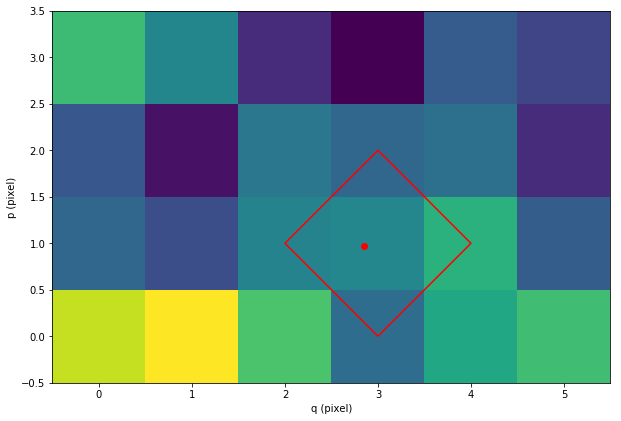

In [131]:
fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(10,10))
debl.plotAGroup(ax,0)


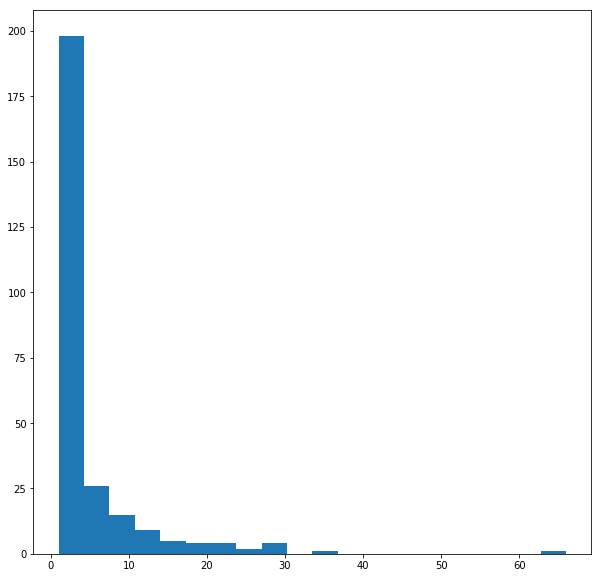

In [132]:
# show histogram of nb of sources
fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(10,10))
debl.plotHistNbS(ax)

In [136]:
# do the deblending.
%prun debl.deblend(listGroupToDeblend=[1,2,3])

























  0%|          | 0/3 [00:00<?, ?it/s]























 33%|███▎      | 1/3 [00:11<00:23, 11.90s/it]























 67%|██████▋   | 2/3 [00:14<00:09,  9.25s/it]























100%|██████████| 3/3 [02:12<00:00, 41.71s/it]

         9488712 function calls (9481609 primitive calls) in 132.769 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       83  118.053    1.422  118.053    1.422 {method 'acquire' of '_thread.lock' objects}
     3850    2.090    0.001    2.096    0.001 {built-in method numpy.core.multiarray.array}
   361641    1.816    0.000    3.826    0.000 header.py:1103(append)
      143    1.468    0.010    1.468    0.010 {method 'astype' of 'numpy.ndarray' objects}
   272202    1.319    0.000    2.044    0.000 copy.py:268(_reconstruct)
   271878    1.074    0.000    4.112    0.000 copy.py:66(copy)
       30    0.742    0.025    0.742    0.025 {built-in method scipy.ndimage._nd_image.geometric_transform}
       15    0.505    0.034    0.505    0.034 {method 'argsort' of 'numpy.ndarray' objects}
  1666425    0.427    0.000    0.430    0.000 {built-in method builtins.isinstance}
   272202    0.387    0.000    0.387    0.000 {method '__r

In [137]:
debl.table_sources

ID,Xi2,Condition Number,G_ID
str5,float64,float64,int64
bg,0.32864609733929484,1.0,1
4696,0.30446346111545364,1.0,1
bg,0.37876074392006326,1.0,2
22466,0.382031657703992,1.0,2
bg,0.3935656048156399,2.692647270548453,3
4452,0.37144425630342254,2.692647270548453,3
6672,0.3838172911047208,2.692647270548453,3
6775,0.37152412305679844,2.692647270548453,3
10416,0.3846052126909841,2.692647270548453,3


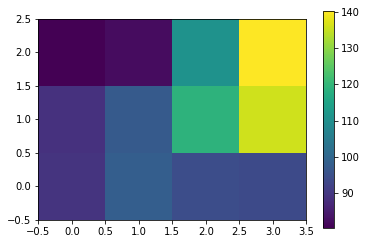

In [128]:
plt.imshow(debl.results['Estimated Cubes'][1].sum(axis=0))
plt.colorbar()

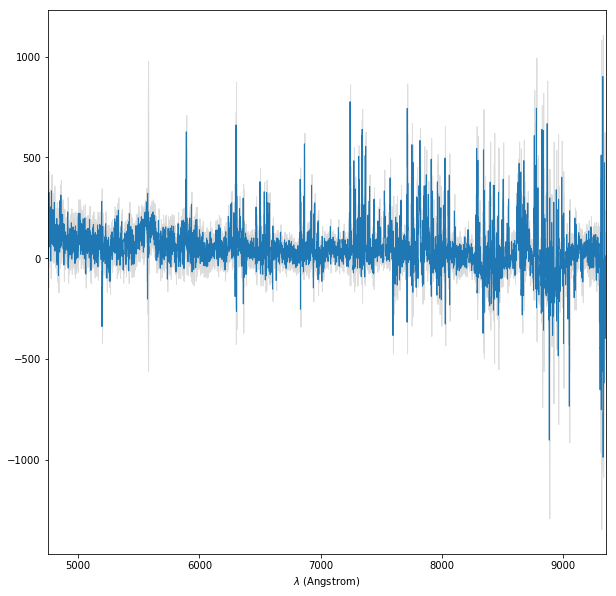

In [12]:
fig,ax = plt.subplots(ncols=1, nrows=1,figsize=(10,10))
debl.table_results[5]['spec'].plot(noise=True,ax=ax)